<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :blue; border-radius: 100px 100px; text-align:center " >Table of Contents</h1>


* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Loading](#1.2)
    * [1.3 Data Cleaning](#1.3)
* [2. Exploratory Data Analysis (EDA)](#2)
* [3. References](#3)

<a id = '1'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : blue; border-radius: 100px 100px; text-align:center"> 1. Introduction </h2>


Os incêndios florestais são um problema sério para a preservação das florestas tropicais. A maior parte da floresta Amazônica, maior floresta tropical do mundo, está contida no Brasil. 
Os impactos dos incêndios florestais podem ser diretos ou indiretos, conforme alguns exemplos a seguir:
Diretos: mortalidade animal, vegetação, degradação do solo;
Indiretos: modificação de habitat, migração de espécies, erosão do solo, poluição da água, deslizamentos de terra. 
Entender a frequência dos incêndios florestais ao longo do tempo pode auxiliar na prevenção deste problema.

Este dataset contém o número de incêndios florestais no Brasil divididos por estados. Estes dados compreendem um período de aproximadamente 10 anos (1998 a 2017). Os dados foram obtidos do site oficial do governo do Brasil:

http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif

Obs: Para informações referentes ao Código Florestal (Lei nº 12.651/2012), acessar: http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12651.htm


<a id = '1.1'></a>

<h2 style = "background-color: #f6f5f5; color : blue; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">1.1 Libraries and Utilities</h2>

In [1]:
# basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#visualization modules
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/forest-fires-in-brazil/amazon.csv


<a id = '1.2'></a>

<h2 style = "background-color: #f6f5f5; color : blue; font-size: 35px; font-family:garamond; font-weight:normal; border-radius: 100px 100px; text-align: center">1.2 Data Loading </h2>

In [2]:
df = pd.read_csv('/kaggle/input/forest-fires-in-brazil/amazon.csv', encoding="latin1")
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


<a id = '1.3'></a>

<h2 style = "background-color: #f6f5f5; color : blue; font-size: 35px; font-family:garamond; font-weight:normal; border-radius: 100px 100px; text-align: center">1.3 Data Cleaning </h2>

<h4 style = "background-color: white; color : blue; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Verificação de Possíveis Valores Nulos</h4>

In [3]:
#check missing value of dataset
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

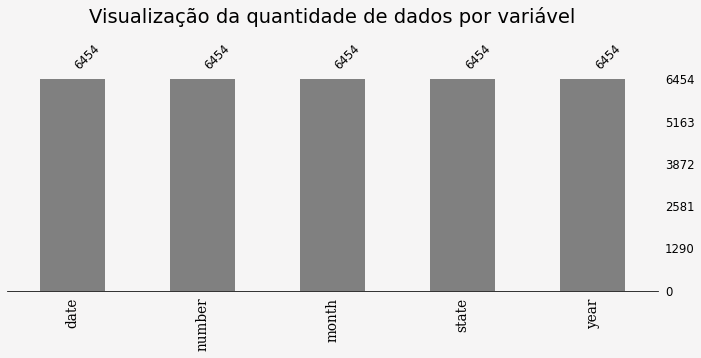

In [4]:
color = ['grey','grey','grey','grey','grey']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =12,
         labels = 'off',filter = 'top')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=14, 
                   ha = 'center', **{'font': 'Serif','weight':'normal','color':'black'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.title('Visualização da quantidade de dados por variável', size=20, pad=20)
fig.show()

Percebemos que não há dados nulos neste dataset.

<h4 style = "background-color: white; color : blue; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Limpeza de Possíveis Dados Duplicados </h4>

**Verificação do Shape do dataset**

In [5]:
df.shape

(6454, 5)

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(6422, 5)

O shape do DataFrame variou de 6454x5 para 6422x5, com isso é possível notar que haviam dados repetidos e a partir deste ponto estes dados duplicados foram removidos.

<h4 style = "background-color: white; color : blue; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Busca por Possíveis Dados Incoerentes </h4>

Nesse momento, analisaremos cada coluna individualmente com o objetivo de identificar possíveis dados incoerentes

In [7]:
df.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

Podemos notar que os dados referentes aos anos estão conforme o esperado, isto é, entre 1998 e 2017.

In [8]:
df.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

Podemos notar que 'Mato Grosso' pode se referir tanto ao Mato Grosso do Sul quanto Mato Grosso e que 'Rio' pode se referir tanto ao Rio de Janeiro quanto Rio Grande do Norte ou Rio Grande do Sul. Como não temos como distinguir de forma realista o número de incêndios florestais em cada um desses estados, não iremos levar em consideração estes 5 estados: Mato Grosso do Sul, Mato Grosso,Rio de Janeiro,Rio Grande do Norte e Rio Grande do Sul.

In [9]:
df.drop(df[df.state =='Mato Grosso'].index, inplace = True)
df.drop(df[df.state =='Rio'].index, inplace = True)
df.shape

(5252, 5)

In [10]:
df.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

Da mesma forma, notamos que os dados referentes aos meses estão conforme o esperado.

In [11]:
df.number.unique()

array([  0.   ,  10.   ,  12.   , ...,   2.969, 833.   , 623.   ])

Para a columa de números, verificamos que os dados referentes também estão conforme o esperado.

In [12]:
df.date.unique()

array(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
       '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
       '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01'],
      dtype=object)

Para a coluna de datas, podemos notar que o período está de acordo com o esperado entre 1998 e 2007.

<h4 style = "background-color: white; color : blue; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Visão Geral do Dataset </h4>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5252 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    5252 non-null   int64  
 1   state   5252 non-null   object 
 2   month   5252 non-null   object 
 3   number  5252 non-null   float64
 4   date    5252 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 246.2+ KB


In [14]:
df.describe()

,year,number
count,5252.000000,5252.000000
mean,2007.468203,106.144360
std,5.741324,190.212157
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,22.000000
75%,2012.000000,109.000000
max,2017.000000,998.000000


<a id = '2'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : blue; border-radius: 100px 100px; text-align:center"> 2. Exploratory Data Analysis </h2>


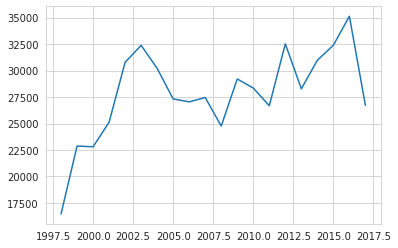

In [15]:
df_year = df.groupby('year')['number'].agg(['sum'])
_ = sns.set_style('whitegrid')
_ = plt.plot(df_year)

<a id = '5'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : blue; border-radius: 100px 100px; text-align:center"> 5. References</h2>

http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif

https://segurossura.com/pt-br/blog/habitat-2/qual-e-o-impacto-dos-incendios-florestais-no-ecossistema/#:~:text=Os%20impactos%20dos%20inc%C3%AAndios%20florestais,deslizamentos%20de%20terra%2C%20entre%20outros.